In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dados_limpos = pd.read_csv('/content/dados_apos_limpeza.csv')
dados_limpos.head()

,idade_pessoa,renda_pessoa,propriedade_casa_pessoa,tempo_emprego_pessoa,intencao_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,inadimplente_pessoa,grau_emprestimo_encoded
0,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,1.0
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,0.0
2,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,1.0
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,2.0
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y,2.0


<ipython-input-2-3728823db8d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='inadimplente_pessoa', data=dados_limpos, palette='Blues')


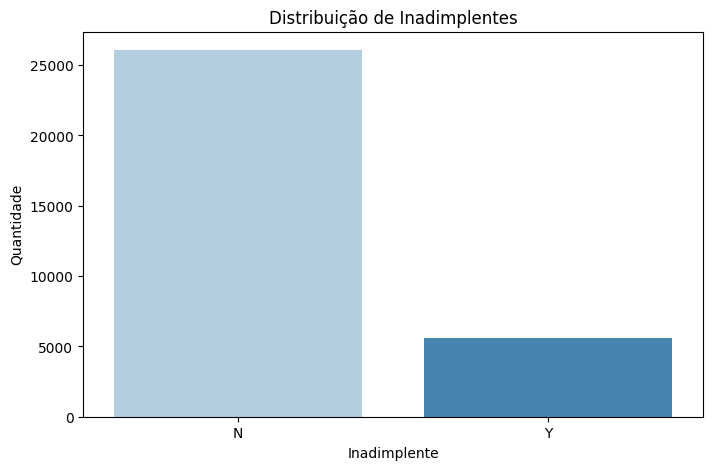

In [ ]:
#Qual é a distribuição de inadimplentes (inadimplente_pessoa) no conjunto de dados?
plt.figure(figsize=(8, 5))
sns.countplot(x='inadimplente_pessoa', data=dados_limpos, palette='Blues')
plt.title('Distribuição de Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade')
plt.show()

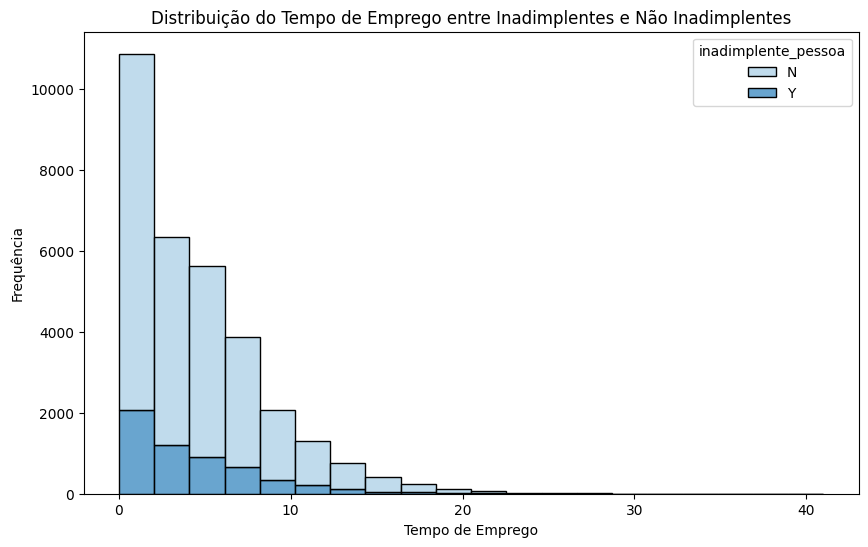

In [ ]:
#Como se distribui o tempo de emprego (tempo_emprego_pessoa) entre inadimplentes e não inadimplentes?
plt.figure(figsize=(10, 6))
sns.histplot(data=dados_limpos, x='tempo_emprego_pessoa', hue='inadimplente_pessoa', multiple='stack', palette='Blues', bins=20)
plt.title('Distribuição do Tempo de Emprego entre Inadimplentes e Não Inadimplentes')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Frequência')
plt.show()

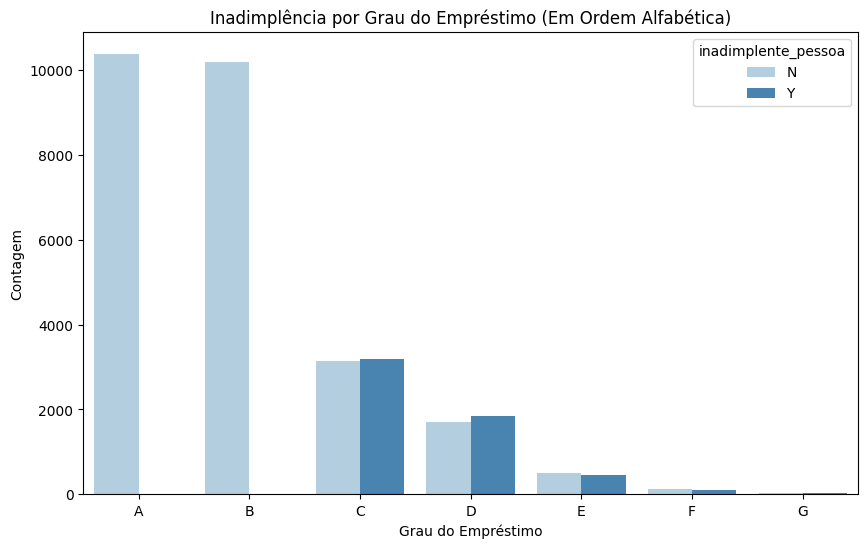

In [ ]:
dados_limpos['grau_emprestimo'] = dados_limpos['grau_emprestimo'].astype(str)

#  o gráfico "Inadimplência por Grau do Empréstimo"
plt.figure(figsize=(10, 6))
sns.countplot(x='grau_emprestimo', hue='inadimplente_pessoa', data=dados_limpos, palette='Blues', order=sorted(dados_limpos['grau_emprestimo'].unique()))
plt.title('Inadimplência por Grau do Empréstimo (Em Ordem Alfabética)')
plt.xlabel('Grau do Empréstimo')
plt.ylabel('Contagem')
plt.show()

Conforme avançamos dos graus de empréstimo de A para G, a taxa de inadimplência aumenta.
Grau A apresenta a menor taxa de inadimplência, indicando clientes com boa avaliação de risco.
A inadimplência aumenta gradualmente através dos graus, sendo os graus F e G os de maior risco.
Esta análise ajuda a identificar os graus de empréstimo que requerem políticas mais rigorosas de mitigação de risco, especialmente para os graus mais altos, como F e G.

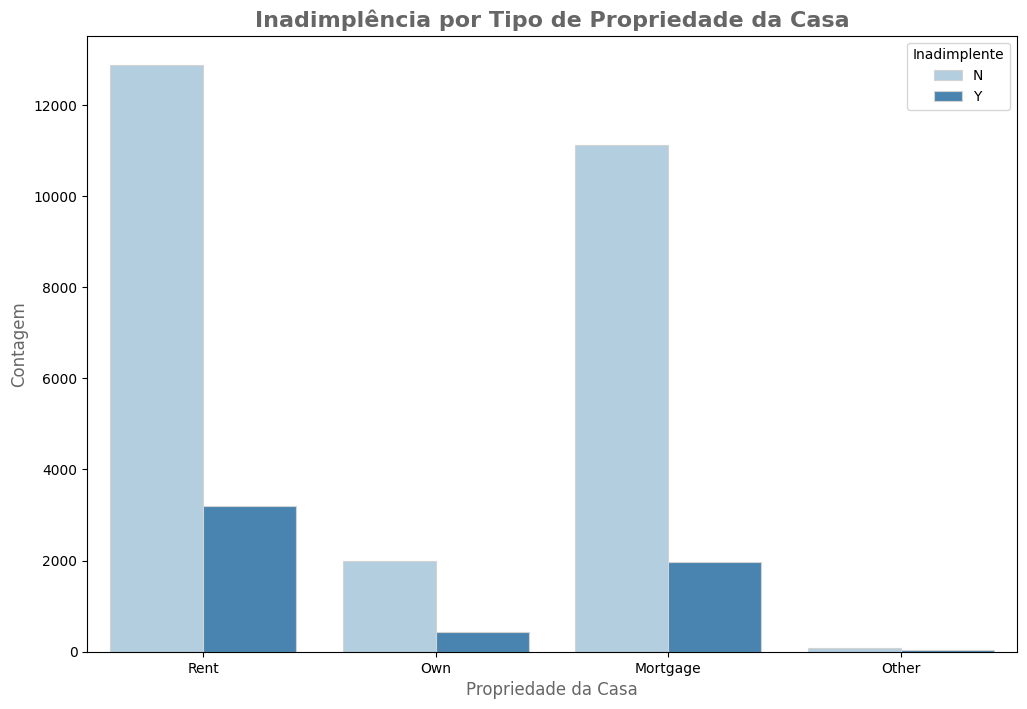

In [ ]:
plt.figure(figsize=(12, 8))

# Aplicando a paleta "Blues" para o gráfico
sns.countplot(
    x='propriedade_casa_pessoa',
    hue='inadimplente_pessoa',
    data=dados_limpos,
    palette='Blues',  # Aplicando a paleta "Blues"
    edgecolor='#d3d3d3', linewidth=0.8
)

plt.title('Inadimplência por Tipo de Propriedade da Casa', fontsize=16, fontweight='bold', color='#666666')
plt.xlabel('Propriedade da Casa', fontsize=12, color='#666666')
plt.ylabel('Contagem', fontsize=12, color='#666666')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Remover linhas de grade e aplicar contornos adequados
plt.grid(False)  # Remover linhas de grade para evitar distração
plt.legend(title='Inadimplente', title_fontsize=10, fontsize=10, loc='upper right')

plt.show()

Padrões de Inadimplência Associados ao Tipo de Propriedade:

O gráfico de barras apresenta a distribuição da inadimplência entre os clientes que possuem casa própria, têm uma hipoteca, ou alugam. Observamos como diferentes tipos de propriedade influenciam o comportamento financeiro e a probabilidade de inadimplência.

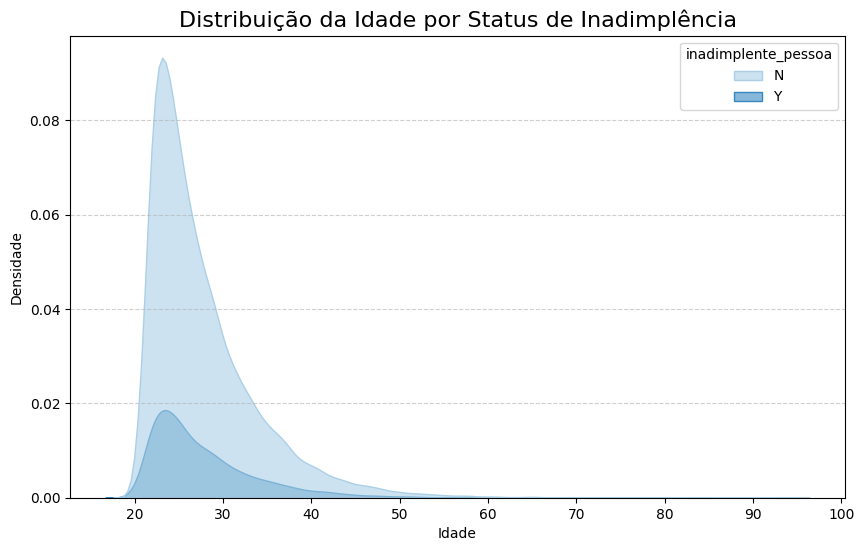

In [ ]:
# Qual é a relação entre idade e taxa de inadimplência?

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dados_limpos, x='idade_pessoa', hue='inadimplente_pessoa', fill=True, palette='Blues', alpha=0.6)
plt.title('Distribuição da Idade por Status de Inadimplência', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-20-f117b3214d35>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao_casa_3 = dados_limpos.groupby(['faixa_etaria_3', 'propriedade_casa_pessoa']).size().unstack()


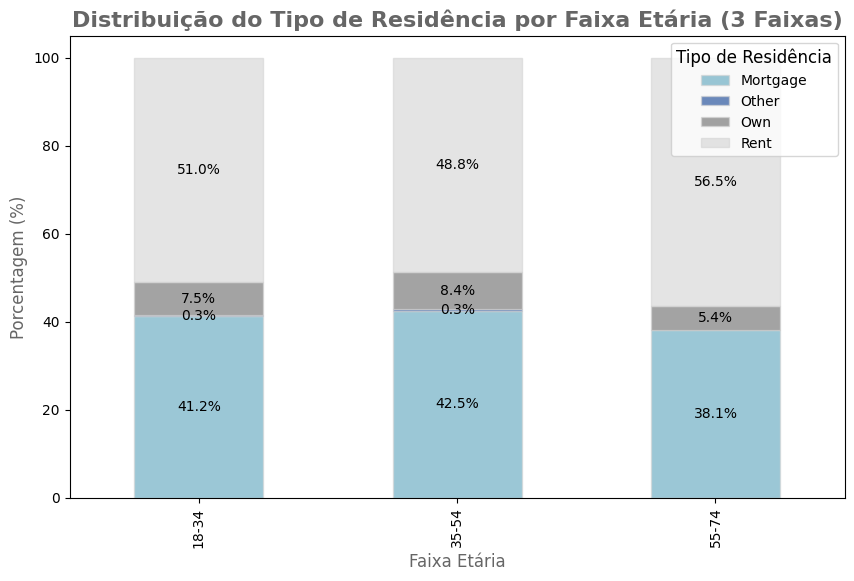

In [ ]:

# Configurações das faixas etárias e labels
faixas_etarias_3 = [18, 35, 55, 75]
labels_etarias_3 = ["18-34", "35-54", "55-74"]

# Criando faixas etárias com as categorias definidas
dados_limpos['faixa_etaria_3'] = pd.cut(dados_limpos['idade_pessoa'], bins=faixas_etarias_3, labels=labels_etarias_3, right=False)

# Análise 1: Distribuição do tipo de casa por faixa etária (3 faixas)
distribuicao_casa_3 = dados_limpos.groupby(['faixa_etaria_3', 'propriedade_casa_pessoa']).size().unstack()

# Gráfico de barras empilhadas
distribuicao_casa_3_pct = distribuicao_casa_3.div(distribuicao_casa_3.sum(axis=1), axis=0) * 100

# Gráfico com a configuração especificada pelo usuário
# Aplicando cores especificadas pelo usuário
cores = ['#58a3bc', '#0b3d91', '#666666', '#d3d3d3']  # Azul claro (mortgage), azul bem escuro (other), cinza escuro (own), cinza claro (rent)  # Azul claro, azul muito claro, azul bem escuro (other), cinza claro  # Azul claro, azul muito claro, cinza escuro, azul bem escuro  # Azul claro, azul muito claro, cinza escuro, cinza claro  # Azul claro, azul muito claro, cinza escuro
distribuicao_casa_3_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores, edgecolor='#d3d3d3', alpha=0.6)

# Ajuste dos valores nas barras
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Apenas adiciona valores se o tamanho da barra for maior que zero
        plt.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10, color='black')

# Estilo e etiquetas do gráfico
plt.title("Distribuição do Tipo de Residência por Faixa Etária (3 Faixas)", fontsize=16, fontweight='bold', color='#666666')
plt.xlabel("Faixa Etária", fontsize=12, color='#666666')
plt.ylabel("Porcentagem (%)", fontsize=12, color='#666666')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.legend(title="Tipo de Residência", fontsize=10, title_fontsize=12)

# Remover linhas de grade para um visual mais limpo
plt.gca().grid(False)

plt.show()



Distribuição do tipo de residência por faixa etária:

Jovens (18-34): Maior proporção de aluguel ou morando com parentes.

Adultos (35-54): Equilíbrio maior entre os tipos de residência, com aumento de casa própria.

Idosos (55-74): Predominância de casa própria.

<ipython-input-24-0beccdd5e637>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inadimplencia_por_casa_3 = dados_limpos[dados_limpos['inadimplente_pessoa'] == 'Y'].groupby(
<ipython-input-24-0beccdd5e637>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_casa_3 = dados_limpos.groupby(['faixa_etaria_3', 'propriedade_casa_pessoa']).size()


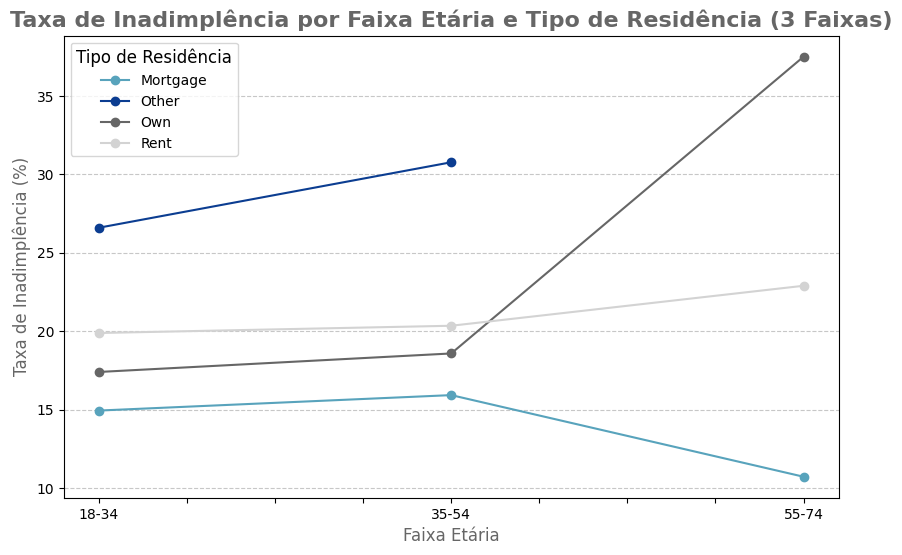

In [ ]:
# Taxa de inadimplência por faixa etária e tipo de residência (3 faixas)

inadimplencia_por_casa_3 = dados_limpos[dados_limpos['inadimplente_pessoa'] == 'Y'].groupby(
    ['faixa_etaria_3', 'propriedade_casa_pessoa']).size()

total_por_casa_3 = dados_limpos.groupby(['faixa_etaria_3', 'propriedade_casa_pessoa']).size()

# Taxa de inadimplência
taxa_inadimplencia_3 = (inadimplencia_por_casa_3 / total_por_casa_3 * 100).unstack()

# Gráfico de linhas
taxa_inadimplencia_3.plot(kind='line', marker='o', figsize=(10, 6), color=['#58a3bc', '#0b3d91', '#666666', '#d3d3d3'])  # Usando as cores especificadas pelo usuário
plt.title("Taxa de Inadimplência por Faixa Etária e Tipo de Residência (3 Faixas)", fontsize=16, fontweight='bold', color='#666666')
plt.xlabel("Faixa Etária", fontsize=12, color='#666666')
plt.ylabel("Taxa de Inadimplência (%)", fontsize=12, color='#666666')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.legend(title="Tipo de Residência", fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Taxa de inadimplência por faixa etária e tipo de residência:

A inadimplência é mais alta entre jovens (18-34) que vivem em aluguel.
Adultos e idosos com casa própria apresentam as menores taxas de inadimplência.

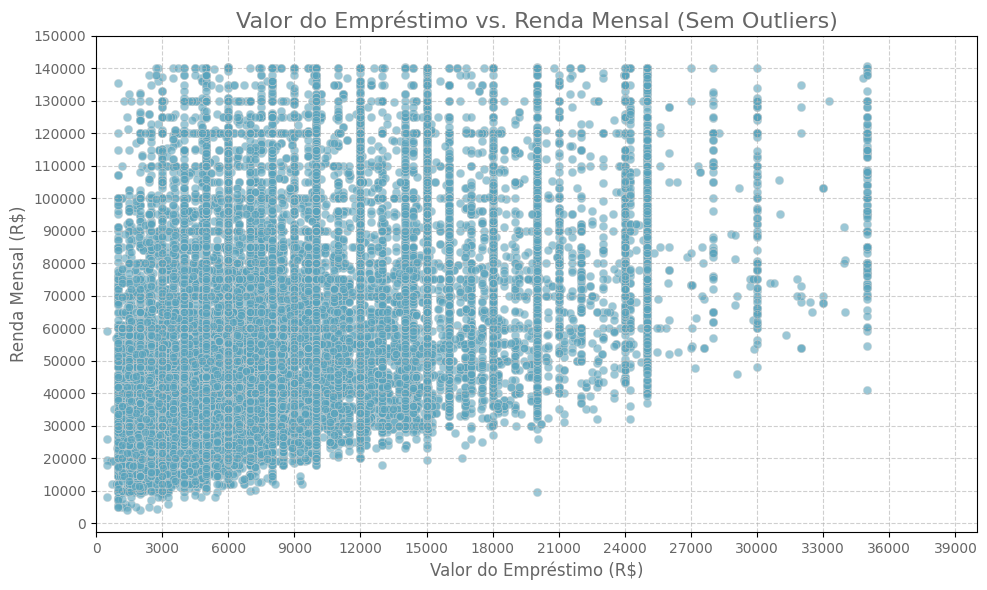

In [ ]:
# Remover valores nulos das colunas relevantes
dados_filtrados = dados_limpos[['renda_pessoa', 'valor_emprestimo']].dropna()

# Identificar os outliers usando o método IQR
q1 = dados_filtrados['renda_pessoa'].quantile(0.25)
q3 = dados_filtrados['renda_pessoa'].quantile(0.75)
iqr = q3 - q1

# Definir limites para os outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar os dados removendo os outliers
dados_sem_outliers = dados_filtrados[
    (dados_filtrados['renda_pessoa'] >= limite_inferior) &
    (dados_filtrados['renda_pessoa'] <= limite_superior)
]

# Gerar o gráfico de dispersão com a escala ajustada
plt.figure(figsize=(10, 6))
plt.scatter(
    dados_sem_outliers['valor_emprestimo'],
    dados_sem_outliers['renda_pessoa'],
    alpha=0.6, edgecolor='#d3d3d3', linewidth=0.5, color='#58a3bc'
)
plt.title('Valor do Empréstimo vs. Renda Mensal (Sem Outliers)', fontsize=16, color='#666666')
plt.xlabel('Valor do Empréstimo (R$)', fontsize=12, color='#666666')
plt.ylabel('Renda Mensal (R$)', fontsize=12, color='#666666')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, color='#666666')
plt.yticks(ticks=range(0, int(dados_sem_outliers['renda_pessoa'].max()) + 10000, 10000), fontsize=10, color='#666666')  # Definir escala do eixo Y de 10000 em 10000
plt.xlim(0, 40000)  # Limitar a escala no eixo X até 40000
plt.xticks(ticks=range(0, 40001, 3000), fontsize=10, color='#666666')  # Definir escala do eixo X de 3000 em 3000
plt.tight_layout()
plt.show()




Relação Entre Renda e Valor do Empréstimo

    Observa-se uma linha de tendência implícita, indicando que quanto maior o valor do empréstimo solicitado, maior tende a ser a renda mensal do cliente. No entanto, a correlação não é perfeita, já que existem exceções, como clientes com renda moderada que ainda solicitam valores elevados.
    Para rendas acima de R$ 30.000, a quantidade de empréstimos menores (abaixo de R$ 10.000) é significativamente reduzida. Isso sugere que clientes com rendas mais altas tendem a pedir empréstimos maiores, possivelmente porque possuem maior poder aquisitivo e maior confiança em sua capacidade de pagamento.

Concentração de Empréstimos

    A maior concentração de dados está:
        Rendas mensais entre R$ 10.000 e R$ 20.000, correspondendo a clientes com capacidade de pagamento moderada.
        Valores de empréstimos entre R$ 5.000 e R$ 15.000, que parecem ser as faixas mais populares, possivelmente devido a limites de crédito padrão ou necessidades financeiras típicas.
    Conforme a renda aumenta além de R$ 20.000, a quantidade de solicitações de empréstimos começa a diminuir, indicando que clientes com rendas mais altas podem ter menos necessidade de crédito ou buscar outras formas de financiamento.

<ipython-input-41-0b350663d99c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inadimplencia_por_tempo = dados_limpos[dados_limpos['inadimplente_pessoa'] == 'Y'].groupby('faixa_tempo_emprego').size()
<ipython-input-41-0b350663d99c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_tempo = dados_limpos.groupby('faixa_tempo_emprego').size()


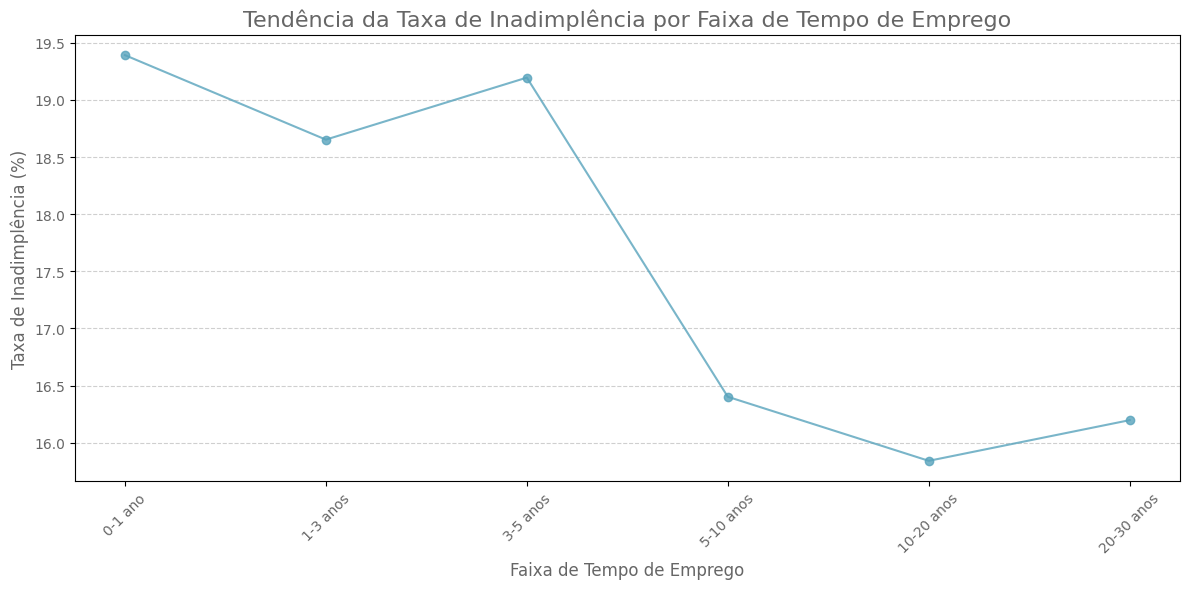

In [ ]:
bins_tempo_emprego = [0, 1, 3, 5, 10, 20, 30]
labels_tempo_emprego = ['0-1 ano', '1-3 anos', '3-5 anos', '5-10 anos', '10-20 anos', '20-30 anos']
dados_limpos['faixa_tempo_emprego'] = pd.cut(dados_limpos['tempo_emprego_pessoa'], bins=bins_tempo_emprego, labels=labels_tempo_emprego, right=False)

inadimplencia_por_tempo = dados_limpos[dados_limpos['inadimplente_pessoa'] == 'Y'].groupby('faixa_tempo_emprego').size()
total_por_tempo = dados_limpos.groupby('faixa_tempo_emprego').size()
taxa_inadimplencia_tempo = (inadimplencia_por_tempo / total_por_tempo * 100).fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(taxa_inadimplencia_tempo.index, taxa_inadimplencia_tempo.values, marker='o', color='#58a3bc', alpha=0.8)
plt.title('Tendência da Taxa de Inadimplência por Faixa de Tempo de Emprego', fontsize=16, color='#666666')
plt.xlabel('Faixa de Tempo de Emprego', fontsize=12, color='#666666')
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12, color='#666666')
plt.xticks(fontsize=10, color='#666666', rotation=45)
plt.yticks(fontsize=10, color='#666666')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Clientes com maior tempo de emprego tendem a ser mais confiáveis financeiramente, com menores taxas de inadimplência.
O tempo de emprego é um indicador importante de estabilidade econômica e capacidade de pagamento.